Data Assignment 1

Part of speech tagging

Mary E. Rodgers


# Introduction

At three years old, children should have around 1000  words (ASHA, 2023). However, children diagnosed with autism spectrum disorder (ASD) acquire language at a lower rate than their peers. When assessing the language development of a child, both on and off the spectrum, several measures can be used. A common descriptive used in language development is part of speech tagging (POS). With POS, metrics such as the number of nouns a child uses can be calculated. Current research indicates that the number of subjects (i.e., nouns) a caregiver models for their child may increase the number of nouns that a child acquires at a faster rate (Hadley at al., 2018; Hadley et al., 2020). In this paper, POS tags will be used to calculate the number of nouns at post-testing for caregivers. The POS tags will be implemented using spaCY, an open-sourced Python library for natural language processing (NLP; Honnibal & Montani, 2017).

The primary research question of this paper is
1. What is the correlation between number of nouns modeled by caregivers and child number of different words?

2. Is there a significant difference in the number of nouns for the TX and BAU caregiver groups at post-test?

# Method

## Corpus

The body of texts, or corpus, for this research paper are a selection of the child-caregiver interaction (CCX) transcripts from a previously completed research study (Roberts et al., 2022) that took place at Vanderbilt and Northwestern University. In this randomized clinical trial (RCT), caregivers of toddlers with ASD were randomized equally into the treatment (TX) or business as usual (BAU) condition. All caregivers consented into the study received developmental information about their child and payment for their participation. Caregivers in the TX group also had a therapist train them in using Enhanced Milieu Teaching (EMT), a naturalistic language intervetnion strategy, with their child. During the CCX, caregivers were instructed to play with their children as they typically would for 10 minutes. The CCX was filmed and later transcribed by research team members naive to the randomization of the participating dyad. A CCX was collected at pre-, post, and follow-up testing. The sample of transcripts in this research paper come from the post-testing CCX for the Northwestern site.

All completed CCX's were exported from the native software, Systematic Analysis of Language Transcripts (SALT; Miller et al., 2020) and included. This resulted in 301 transcripts, with 113 from pre-testing (T00), 101 from post-testing (T01), and 87 from follow-up testing (T02).

## POS Tagging in the Roberts et al. (2022) Corpus

In Google Colab (Bisong, 2019), python code was used with the spaCY (Honniball & Montani, 2017) to identify the number of nouns caregivers used at all assessment time points.

## Statistical Analysis

In Google Colab (Bisong, 2019), a correlation was run between the number of nouns caregivers used at post-testing and the number of different words children had at follow-up testing. Additionally, a two-sample t- test was used on the number of nouns between each group was run.





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# NLP Analysis

The steps taken in this NLP analysis included:
(1) Accessing the CCX transcripts through Google Colab (Bisong) and Pandas (The pandas development team, 2023);
(2) Using spaCy to calculate POS tags by CCX group (TX or BAU);
and (3) Appending the spaCy results to Pandas dataframe and exporting the dataframe.

## Step 1: Accessing the CCX transcripts through Google Colab and Pandas
Allow Google colab to access the data you have on your Google Drive, and map the [directory location of your data.](https://drive.google.com/drive/folders/1QWDOJZTlAkDxplsSgVvs9uGkJF9rllr3?usp=sharing)

In [ ]:
os.getcwd()

'/content/drive/MyDrive/Professional/4_PhD/Classes/9_Fall_2023/SPED7500_ComputationalLanguageAnalysis/Assignments/Data_Assignments/Assignment1_POS'

In [ ]:
os.chdir('Assignment1_POS')
os.listdir()

['Rodgers_Assignment1.ipynb', 'SALT_Files', 'DosageDataSet_10.21.23.csv']

In [ ]:
from google.colab import drive # this imports Google Drive (Drive) into Google Colab (Colab)

drive.mount('/content/drive') # this mounts Drive into Colab

!ls "/content/drive/My Drive" # this shows the content on your Drive

import os #this package deciphers which operating system you are using

os.chdir("/content/drive/MyDrive/Professional/4_PhD/Classes/9_Fall_2023/SPED7500_ComputationalLanguageAnalysis/Assignments/Data_Assignments/Assignment1_POS") #this is where you change the directory to where your data is located on Drive

os.listdir() #this lists what you now have available

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'Colab Notebooks'   Personal   Professional   writing_data.gsheet


['Rodgers_Assignment1.ipynb',
 'SALT_Files',
 'DosageDataSet_10.21.23.csv',
 'DOSAGE_DATA_TRANSCRIPT.csv',
 'DOSAGE_DATA_POS.csv',
 'BAU_DOSAGE_DATA_POS.csv',
 'TX_DOSAGE_DATA_POS.csv']

Call in the .slt files as .txt files, and create the columns

Import Pandas

In [ ]:
import pandas as pd

Call in .csv file containing meta data

In [ ]:
import os
os.listdir('SALT_Files')
df = pd.DataFrame(columns = ['id', 'session', 'data', 'filename']) # create a data frame with the variables we want from the transcripts


os.chdir('SALT_Files') # call in the salt files
for filename in os.listdir():
  with open(filename, 'r') as fp:
    data = fp.read()

  id = None # create columns using header information from the transcripts by looping through
  session = None
  for row in data.split('\n'):
    if row.startswith('+ ID'):
      id = row[6:]
    if row.startswith('+ Session'):
      session = row[10:]
    if id and session:
      break # stop the loop after getting the header information needed

  df.loc[len(df.index)] = [id, session, data, filename]

os.chdir("..") # go back to the main folder

df # inspect the data frame visually

,id,session,data,filename
0,BA2029,T00_01,"﻿$ Child, Adult\n+ ID: BA2029\n+ Gender: F\n+ ...",dosage_T00_01_ccx_c_p_2029.slt
1,BA2026,T00_01,"﻿$ Child, Adult\n+ ID: BA2026\n+ Gender: M\n+ ...",dosage_T00_01_ccx_c_p_2026.slt
2,2033,T00_01,"﻿$ Child, Adult\n+ ID: 2033\n+ Gender: F\n+ DO...",dosage_t00_01_ccx_c_p_2033.slt
3,BA2027,T00_01,"﻿$ Child, Adult\n+ ID: BA2027\n+ Gender: M\n+ ...",dosage_T00_01_ccx_c_p_2027.slt
4,BA2034,t00,"﻿$ Child, Adult\n+ ID: BA2034\n+ Gender: M\n+...",dosage_t00_01_ccx_c_p_2034.slt
...,...,...,...,...
303,BA2018,T00_01,"$ Child, Adult\n+ ID: BA2018\n+ Gender: F\n+ D...",dosage_T00_01_ccx_c_p_2018.SLT
304,BA2044,t01_01,"﻿$ Child, Adult\n+ ID: BA2044\n+ Gender: M\n+ ...",dosage_T01_01_ccx_c_p_2044.SLT
305,2051,T00,"$ Child, Adult\n+ ID: 2051\n+ Gender: M\n+ DOB...",dosage_t00_01_ccx_c_p_2051.SLT
306,BA1033,T01,"$ Child, Adult\n+ ID: BA1033\n+ Gender: Male\n...",dosage_t01_01_ccx_c_p_BA1033.SLT


Call in the original data set that does not contain the transcripts

In [ ]:
DOSAGE_DATA = pd.read_csv('DosageDataSet_10.21.23.csv', encoding = "ISO-8859-1") # read in the original dosage data set, which contains group randomization
DOSAGE_DATA.rename(columns = {'ï»¿ID':'ID'}, inplace = True)  # fix column name
DOSAGE_DATA = DOSAGE_DATA[DOSAGE_DATA['ID'].notna()]

DOSAGE_DATA

,ID,Condition_Group,Condition_Number,T00_TRANSCRIPT,T00_CCX_ChildTotalUtterances_unprompted,T00_CCX_ChildNDW_unprompted,T00_CCX_mt_sw,T00_CCX_et_sw,T00_CCX_mt_et_sw,T00_CCX_mt_tt_ss,...,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82
0,1003.0,Control,2.0,NaN,3.0,2.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1004.0,Control,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1006.0,Control,2.0,NaN,1.0,1.0,9.0,0.0,9.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1009.0,Control,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1010.0,Control,2.0,NaN,11.0,7.0,10.0,1.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2051.0,Intervention,1.0,NaN,0.0,0.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,2053.0,Intervention,1.0,NaN,2.0,2.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,2055.0,Intervention,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,2056.0,Intervention,1.0,NaN,2.0,1.0,10.0,0.0,10.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Bring the transcript data into the dosage data set, so that the transcripts appear in the original data set aligned by ID and assessment timepoint

In [ ]:
df[df['id'].str.contains('1003')] # look at the dataframe for one ID number, to see what time points are available

,id,session,data,filename
119,BA1003,t01_01,"$ Child, Adult\n+ ID: BA1003\n+ Gender: M\n+ D...",dosage_t01_01_ccx_c_p_BA1003.SLT
204,BA1003,T02,"﻿$ Child, Adult\n+ ID: BA1003\n+ Gender: Male\...",dosage_t02_01_ccx_c_p_BA1003.SLT
295,BA1003,t00_01_ccx_c_p_BA1003,"$ Child, Adult\n+ ID: BA1003\n+ Gender: M\n+ D...",dosage_t00_01_ccx_c_p_BA1003.SLT


In [ ]:
df['session'].unique() # look at the session names to see what formats we have to deal with

array([' T00_01', ' t00', ' T00', ' t00_01_ccx_c_p', ' T00_01_ccx_c_p',
       ' t00_01', ' t00_01_ccx_h_p', ' t00_01_ccx_c_p_2003\t',
       ' t00_01_ccx_c_p_BA2004\t', 't00_01_ccx_c_p ', ' t01_01',
       ' t01_01_ccx_c_p', ' T01_01', ' t01_01_ccx_c_p ', ' T01', ' t01',
       '  T01_01', ' t01_01_ccx_h_p ', ' t01_01_ccx_p', ' t01_01_ccx_h_p',
       ' t01_02', ' t01_01_ccx_c_t_BA1048', ' T02_01_ccx_c_p_2016',
       ' T02', ' t02_01', ' t02', ' t02_01_ccx_c_p_BABA1015', ' t02 ',
       ' T02_01', ' t02_01_ccx_c_p', ' T02_CCX', '  T02-01',
       ' T02_01_ccx_c_p_2007', ' T02_01_ccx_c_p_2012',
       ' T02_01_ccx_c_p_2014', ' T02_01_ccx_c_p_2019', ' TO2_01',
       ' T02_01 ', ' t02_01_ccx_c_p_BA1007', ' t00_01_ccx_c_p ',
       ' t02_01_ccx_c_t', ' T02_01_ccx_c_p', ' T02_01_ccx_c_p_BA1033',
       ' T02_01_ccx_c_p_BA1040', ' T02_01_ccx_c_p_BA1041', ' T00\t',
       ' t00_01_ccx_c_p_BA2022\t', ' T00_01_ccx_c_p_2002', ' T00_01_ccx',
       ' t00_01_ccx_c_p_BA1002', ' t00_01_ccx_c_p_BA

In [ ]:
DOSAGE_DATA[DOSAGE_DATA['ID'] == 1003.0] # checking one ID number to see what it looks like

,ID,Condition_Group,Condition_Number,T00_TRANSCRIPT,T00_CCX_ChildTotalUtterances_unprompted,T00_CCX_ChildNDW_unprompted,T00_CCX_mt_sw,T00_CCX_et_sw,T00_CCX_mt_et_sw,T00_CCX_mt_tt_ss,...,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82
0,1003.0,Control,2.0,NaN,3.0,2.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for index in DOSAGE_DATA.index: # insert the transcript data into the dosage data set for T00
  try:
    id = DOSAGE_DATA.loc[index, 'ID']
    id = int(id)
    t00 = df[(df['id'].str.contains(str(id))) &
            (df['session'].str.lower().str.contains('t00'))
            ]['data'].iloc[0]
    DOSAGE_DATA.at[index, 'T00_TRANSCRIPT'] = t00
  except IndexError:
    pass

for index in DOSAGE_DATA.index: # repeat for T01
  try:
    id = DOSAGE_DATA.loc[index, 'ID']
    id = int(id)
    t01 = df[(df['id'].str.contains(str(id))) &
            (df['session'].str.lower().str.contains('t01'))
            ]['data'].iloc[0]
    DOSAGE_DATA.at[index, 'T01_TRANSCRIPT'] = t01
  except IndexError:
    pass

for index in DOSAGE_DATA.index: # repeat for T02
  try:
    id = DOSAGE_DATA.loc[index, 'ID']
    id = int(id)
    t02 = df[(df['id'].str.contains(str(id))) &
            (df['session'].str.lower().str.contains('t02'))
            ]['data'].iloc[0]
    DOSAGE_DATA.at[index, 'T02_TRANSCRIPT'] = t02
  except IndexError:
    pass

DOSAGE_DATA # look at your data

,ID,Condition_Group,Condition_Number,T00_TRANSCRIPT,T00_CCX_ChildTotalUtterances_unprompted,T00_CCX_ChildNDW_unprompted,T00_CCX_mt_sw,T00_CCX_et_sw,T00_CCX_mt_et_sw,T00_CCX_mt_tt_ss,...,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82
0,1003.0,Control,2.0,"$ Child, Adult\n+ ID: BA1003\n+ Gender: M\n+ D...",3.0,2.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1004.0,Control,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1006.0,Control,2.0,"$ Child, Adult\n+ ID: BA1006\n+ Gender: M\n+ D...",1.0,1.0,9.0,0.0,9.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1009.0,Control,2.0,"$ Child, Adult\n+ ID: BA1009\n+ Gender: M\n+ D...",0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1010.0,Control,2.0,"$ Child, Adult\n+ ID: BA1010\n+ Gender: M\n+ D...",11.0,7.0,10.0,1.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2051.0,Intervention,1.0,"$ Child, Adult\n+ ID: 2051\n+ Gender: M\n+ DOB...",0.0,0.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,2053.0,Intervention,1.0,"﻿$ Child, Adult\n+ ID: BA2053\n+ Gender: M\n+ ...",2.0,2.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,2055.0,Intervention,1.0,"﻿$ Child, Adult\n+ ID: 2055 \n+ Gender: M ...",0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,2056.0,Intervention,1.0,"﻿$ Child, Adult\n+ ID: 2056 \n+ Gender: M ...",2.0,1.0,10.0,0.0,10.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Step 2: Clean the transcript data
Use regular expression to clean the transcript data prior to spaCy analysis.

In [ ]:
# testing some regular expression

#import re

# string = "$Child, Adult \n +ID: BA1001 \n -0:23 \n c me a child [w]. \n a {points} me adult [w]."
# string = re.sub(r'\[.*?\]', '', string)

# print(string)

In [ ]:
# string = "$Child, Adult \n +ID: BA1001 \n -0:23 \n c me a child [w]. \na {points} me a adult [w]."
# string = '''$Child, Adult
# +ID: BA1001
# -0:23
# c me a child [w].
# a {points} me a adult [w].'''
# regex = r'^a '

# string.split('\n')[-1]
# string = re.sub(r'^a ', '', string.split('\n')[-1])
# string = re.sub(r'', '', string)
# string = string.replace('\na ', '\n')

# print(string)

In [ ]:
# remove "a" at the beginning of every remaining utterance
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace('\na ', '\n') # this is removing the a at the beginning of every utterances, signifying adult utterance, denoted with an a
string = re.sub(r'\na ', '\n', string)

DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace('\na ', '\n')
string = re.sub(r'\na ', '\n', string)

DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace('\na ', '\n')
string = re.sub(r'\na ', '\n', string)
# print(DOSAGE_DATA.loc[0,"T00_TRANSCRIPT"])
###

# REMOVE
# remove lines starting with: $
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace('\$.*?\n', '', regex=True) # this is removing the speaker IDs, denoted with a $
string = re.sub(r'\$.*?\n', '', string)

DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace('\$.*?\n', '', regex=True)
string = re.sub(r'\$.*?\n', '', string)

DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace('\$.*?\n', '', regex=True)
string = re.sub(r'\$.*?\n', '', string)
# print(DOSAGE_DATA.loc[0,"T00_TRANSCRIPT"])
###

# remove lines starting with: +
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace('\+.*?\n', '', regex=True) # this is removing all the header information, denoted with a +
string = re.sub(r'\+.*?\n', '', string)

DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace('\+.*?\n', '', regex=True)
string = re.sub(r'\+.*?\n', '', string)

DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace('\+.*?\n', '', regex=True)
string = re.sub(r'\+.*?\n', '', string)
# print(DOSAGE_DATA.loc[0,"T00_TRANSCRIPT"])
###

# remove lines that start with: =
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace('\=.*?\n', '', regex=True) # this is removing all the transcript notes, denoted with a =
string = re.sub(r'\=.*?\n', '', string)

DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace('\=.*?\n', '', regex=True)
string = re.sub(r'\=.*?\n', '', string)

DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace('\=.*?\n', '', regex=True)
string = re.sub(r'\=.*?\n', '', string)
# print(DOSAGE_DATA.loc[0,"T00_TRANSCRIPT"])
###

# remove time stamps: -##:##
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace('\-.*?\n', '', regex=True) # this is removing the time stamps in the transcript, marked with a -
string = re.sub(r'\-.*?\n', '', string)

DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace('\-.*?\n', '', regex=True)
string = re.sub(r'\-.*?\n', '', string)

DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace('\-.*?\n', '', regex=True)
string = re.sub(r'\-.*?\n', '', string)
# print(DOSAGE_DATA.loc[0,"T00_TRANSCRIPT"])
###

# remove lines that start with: c
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace('c.*?\n', '', regex=True) # this is removing all the child utterances, denoted with a c
string = re.sub(r'c.*?\n', '', string)

DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace('c.*?\n', '', regex=True)
string = re.sub(r'c.*?\n', '', string)

DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace('c.*?\n', '', regex=True)
string = re.sub(r'c.*?\n', '', string)
# print(DOSAGE_DATA.loc[0,"T00_TRANSCRIPT"])
###

# remove soft brackets and the text within the soft bracketst: {  }
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace('\{.*?\}', '', regex=True) # this is removing transcript information that is non-verbal, such as gestures, denoted within soft brackets
string = re.sub(r'\{.*?\}', '', string)

DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace('\{.*?\}', '', regex=True)
string = re.sub(r'\{.*?\}', '', string)

DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace('\{.*?\}', '', regex=True)
string = re.sub(r'\{.*?\}', '', string)
# print(DOSAGE_DATA.loc[0,"T00_TRANSCRIPT"])
###

# remove parenthese: (  )
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace('\(.*?\)', '', regex=True) # this is removing parenthese, which denotes repetitions and false starts
string = re.sub(r'\(.*?\)', '', string)

DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace('\(.*?\)', '', regex=True)
string = re.sub(r'\(.*?\)', '', string)

DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace('\(.*?\)', '', regex=True)
string = re.sub(r'\(.*?\)', '', string)
# print(DOSAGE_DATA.loc[0,"T00_TRANSCRIPT"])
###

# remove meta data: [n],[o],[ax],[ar],[mt],[ut],[et],[yx],[nx],[ix],[at],[ht],[xt],[pt],[qt],[ge],[ab],[ct],[be],[th],[ja],[nj],[no],[sw],[ad],[tt],[ss],[cs]
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace('\[.*?\]', '', regex=True)
string = re.sub(r'\[.*?\]', '', string)

DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace('\[.*?\]', '', regex=True)
string = re.sub(r'\[.*?\]', '', string)

DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace('\[.*?\]', '', regex=True)
string = re.sub(r'\[.*?\]', '', string)

print(DOSAGE_DATA.loc[0,"T00_TRANSCRIPT"])
###

Back to using Pandas

In [ ]:
# remove overlap symbols before punctuation: <
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace('<', '')
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace('<', '')
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace('<', '')
# remove overlap symbols before punctuation: >
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace('>', '')
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace('>', '')
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace('>', '')
# print(DOSAGE_DATA.loc[0,"T00_TRANSCRIPT"])
###

# REPLACE
# BA to ''
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace('BA', '')
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace('BA', '')
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace('BA', '')
# /3s to s
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace('/3s', 's')
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace('/3s', 's')
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace('/3s', 's')
# /z to s
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace('/z', 's')
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace('/z', 's')
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace('/z', 's')
# /s to s
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace('/s', 's')
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace('/s', 's')
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace('/s', 's')
# print(DOSAGE_DATA.loc[0,"T00_TRANSCRIPT"])
###

# chunked language
# thankyou
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace('thankyou', 'thank you')
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace('thankyou', 'thank you')
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace('thankyou', 'thank you')
# goodjob
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace('goodjob', 'good job')
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace('goodjob', 'good job')
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace('goodjob', 'good job')
# goodnight
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace('goodnight', 'good night')
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace('goodnight', 'good night')
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace('goodnight', 'good night')
# herewego
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace('herewego', 'here we go')
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace('herewego', 'here we go')
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace('herewego', 'here we go')
# readysetgo
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace('readysetgo', 'ready set go')
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace('readysetgo', 'ready set go')
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace('readysetgo', 'ready set go')
# alldone
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace('alldone', 'all done')
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace('alldone', 'all done')
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace('alldone', 'all done')
# allgone
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace('allgone', 'all gone')
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace('allgone', 'all gone')
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace('allgone', 'all gone')
# ohno
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace('ohno', 'oh no')
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace('ohno', 'oh no')
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace('ohno', 'oh no')
# ohmy
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace('ohmy', 'oh my')
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace('ohmy', 'oh my')
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace('ohmy', 'oh my')
# ohmygoodness
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace('ohmygoodness', 'oh my goodness')
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace('ohmygoodness', 'oh my goodness')
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace('ohmygoodness', 'oh my goodness')
# onceuponatime
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace('onceuponatime', 'once upon a time')
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace('onceuponatime', 'once upon a time')
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace('onceuponatime', 'once upon a time')
# theend
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace('theend', 'the end')
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace('theend', 'the end')
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace('theend', 'the end')
# uhoh
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace('uhoh', 'uh oh')
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace('uhoh', 'uh oh')
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace('uhoh', 'uh oh')
# uhhuh
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace('uhhuh', 'uh huh')
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace('uhhuh', 'uh huh')
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace('uhhuh', 'uh huh')
# uhuh
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace('uhuh', 'uh uh')
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace('uhuh', 'uh uh')
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace('uhuh', 'uh uh')
# yourewelcome
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace('yourewelcome', 'youre welcome')
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace('yourewelcome', 'youre welcome')
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace('yourewelcome', 'youre welcome')
# print(DOSAGE_DATA.loc[0,"T00_TRANSCRIPT"])
###

# REMOVE
# remaining: /
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace('/', '')
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace('/', '')
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace('/', '')

print(DOSAGE_DATA.loc[0,"T00_TRANSCRIPT"])
###

In [ ]:
# ID number with a name
# 1001-2060
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA[['T00_TRANSCRIPT', 'ID']].apply(lambda x: x[0].replace(str(int(x[1])), 'Scott') if x[1] > 0 and type(x[0]) is str else x[0],
                                                                            axis = 1
                                                                            )

DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA[['T01_TRANSCRIPT', 'ID']].apply(lambda x: x[0].replace(str(int(x[1])), 'Scott') if x[1] > 0 and type(x[0]) is str else x[0],
                                                                            axis = 1
                                                                            )

DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA[['T02_TRANSCRIPT', 'ID']].apply(lambda x: x[0].replace(str(int(x[1])), 'Scott') if x[1] > 0 and type(x[0]) is str else x[0],
                                                                            axis = 1
                                                                            )

print(DOSAGE_DATA.loc[0,"T00_TRANSCRIPT"])
###

Save the dataframe with the clean transcript

In [ ]:
DOSAGE_DATA.to_csv('DOSAGE_DATA_TRANSCRIPT.csv')  # save the dataframes

##Step 3: Using spaCy to calculate POS tags by CCX group
Call in spaCY, and run the POS tags on the clean transcript data

In [ ]:
def safe_divide(a, b): #safe divide for POS and number of words
    if b != 0: #
        return a/b
    else:
        return 0

In [ ]:
import spacy # import spaCy
nlp = spacy.load("en_core_web_sm")

DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.lower() #lower case letters T00

DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.lower()

DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.lower()

In [ ]:
# Create a practice dataframe to verify the count of nouns
prac_sent = ['my trees are green. his trees are green. your trees are green. Marys trees are green. The presidents trees are green.'] # creation of a practice sentence

prac_df = pd.DataFrame(prac_sent, columns=['text']) # creation of a practice dataframe

prac_df # print the practice data frame

,text
0,my trees are green. his trees are green. your ...


In [ ]:
# Universal dependency tags practice df

prac_nw_final = []
prac_noun_final = []
prac_pronoun_final = []
prac_propn_final = []

for index, row in prac_df.iterrows(): #go through the Pandas practice df by row
  prac_nw = 0
  prac_noun = 0
  prac_pronoun = 0
  prac_propn = 0
  text = str(row["text"]) # text to sring for spaCy processing
  prac_tokenized_doc = nlp(text) # putting the text in spaCy
  for token in prac_tokenized_doc:
    print(token.text, token.pos_)
    if not token.is_punct and not token.pos_ == "SPACE": # counts as a word if it is not puncutation
        print(token.text, token.pos_, token.dep_) # testing hypothesis
        prac_nw += 1 # adds to new word count for each token not a punctuation
    if token.pos_ == "NOUN":
        print(token.pos)
        prac_noun += 1
    if token.pos_ == "PRON":
        print(token.pos)
        prac_pronoun +=1
    if token.pos_ == "PROPN":
        print(token.pos)
        prac_propn +=1
    prac_nw_final.append(prac_nw)
    prac_noun_final.append(prac_noun)
    prac_pronoun_final.append(prac_pronoun)
    prac_propn_final.append(prac_propn)
    prac_noun_final.append(safe_divide(prac_noun, prac_nw))
    prac_pronoun_final.append(safe_divide(prac_pronoun, prac_nw))
    prac_propn_final.append(safe_divide(prac_propn, prac_nw))

print(prac_nw_final)
print(prac_noun_final)
print(prac_pronoun_final)
print(prac_propn_final)

In [ ]:
# T00 Universal dependency tags

T00_nw_final = []
T00_noun_final = []
T00_pronoun_final = []
T00_propn_final = []
T00_noun_final_pct = [] # percent of nouns out of number of words
T00_pronoun_final_pct = [] # percent of pronouns out of number of words
T00_propn_final_pct = [] # percent of proper nouns out of number of words

for index, row in DOSAGE_DATA.iterrows(): #go through the Pandas TX df by row
  T00_nw = 0
  T00_noun = 0
  T00_pronoun = 0
  T00_propn = 0
  text = str(row["T00_TRANSCRIPT"]) # text to sring for spaCy processing
  T00_tokenized_doc = nlp(text) # putting the text in spaCy
  for token in T00_tokenized_doc:
    # print(token.text, token.pos_)
    if not token.is_punct and not token.pos_ == "SPACE": # counts as a word if it is not puncutation
      # print(token.text, token.pos_, token.dep_) # testing hypothesis
      T00_nw += 1 # adds to new word count for each token not a punctuation
    if token.pos_ == "NOUN":
      # print(token.pos)
      T00_noun += 1
    if token.pos_ == "PRON":
      # print(token.pos)
      T00_pronoun += 1
    if token.pos_ == "PROPN":
      # print (token.pos)
      T00_propn += 1
  T00_nw_final.append(T00_nw)
  T00_noun_final.append(T00_noun)
  T00_pronoun_final.append(T00_pronoun)
  T00_propn_final.append(T00_propn)
  T00_noun_final_pct.append(safe_divide(T00_noun, T00_nw))
  T00_pronoun_final_pct.append(safe_divide(T00_pronoun, T00_nw))
  T00_propn_final_pct.append(safe_divide(T00_propn, T00_nw))

print(T00_nw_final)

print(T00_noun_final)
print(T00_noun_final_pct)

print(T00_pronoun_final)
print(T00_pronoun_final_pct)

print(T00_propn_final)
print(T00_propn_final_pct)

[326, 1, 323, 237, 446, 584, 239, 253, 362, 288, 207, 271, 389, 312, 207, 141, 85, 434, 233, 559, 473, 1, 386, 360, 644, 335, 256, 669, 416, 432, 200, 132, 705, 354, 586, 412, 565, 278, 549, 598, 163, 359, 273, 1, 328, 332, 306, 289, 477, 455, 308, 617, 435, 453, 449, 302, 434, 751, 346, 279, 247, 323, 591, 337, 490, 470, 271, 371, 470, 351, 462, 1, 531, 352, 550, 449, 1, 573, 567, 452, 1, 71, 1, 364, 386, 308, 268, 417, 189, 224, 512, 461, 298, 294, 314, 267, 406, 336, 307, 437, 425, 172, 586, 173, 301, 291, 622, 634, 423, 354, 289, 448, 347, 383, 257, 266, 140, 538, 434, 433]
[28, 0, 28, 25, 64, 93, 35, 33, 50, 37, 12, 50, 76, 44, 35, 35, 19, 72, 48, 68, 60, 0, 76, 55, 84, 36, 52, 102, 55, 49, 26, 19, 130, 58, 76, 61, 60, 40, 82, 102, 38, 60, 34, 0, 43, 45, 38, 43, 41, 74, 49, 103, 65, 62, 50, 33, 35, 106, 56, 52, 50, 63, 115, 28, 50, 40, 35, 59, 52, 54, 68, 0, 92, 57, 75, 59, 0, 74, 91, 88, 0, 6, 0, 81, 44, 42, 58, 44, 28, 36, 78, 54, 44, 53, 44, 50, 76, 56, 58, 59, 58, 19, 81, 34, 

In [ ]:
# T01 Universal dependency tags
## 1. Copy/Paste T00 code into notepad
## 2. Ctrl+H
## 3. Replace T00 --> T01

T01_nw_final = []
T01_noun_final = []
T01_pronoun_final = []
T01_propn_final = []
T01_noun_final_pct = []
T01_pronoun_final_pct = []
T01_propn_final_pct = []

for index, row in DOSAGE_DATA.iterrows(): #go through the Pandas TX df by row
  T01_nw = 0
  T01_noun = 0
  T01_pronoun = 0
  T01_propn = 0
  text = str(row["T01_TRANSCRIPT"]) # text to sring for spaCy processing
  T01_tokenized_doc = nlp(text) # putting the text in spaCy
  for token in T01_tokenized_doc:
    # print(token.text, token.pos_)
    if not token.is_punct and not token.pos_ == "SPACE": # counts as a word if it is not puncutation
      # print(token.text, token.pos_, token.dep_) # testing hypothesis
      T01_nw += 1 # adds to new word count for each token not a punctuation
    if token.pos_ == "NOUN":
      # print(token.pos)
      T01_noun += 1
    if token.pos_ == "PRON":
      # print(token.pos)
      T01_pronoun += 1
    if token.pos_ == "PROPN":
      # print (token.pos)
      T01_propn += 1
  T01_nw_final.append(T01_nw)
  T01_noun_final.append(T01_noun)
  T01_pronoun_final.append(T01_pronoun)
  T01_propn_final.append(T01_propn)
  T01_noun_final_pct.append(safe_divide(T01_noun, T01_nw))
  T01_pronoun_final_pct.append(safe_divide(T01_pronoun, T01_nw))
  T01_propn_final_pct.append(safe_divide(T01_propn, T01_nw))

print(T01_nw_final)

print(T01_noun_final)
print(T01_noun_final_pct)

print(T01_pronoun_final)
print(T01_pronoun_final_pct)

print(T01_propn_final)
print(T01_propn_final_pct)

[344, 1, 362, 110, 191, 530, 364, 373, 441, 606, 230, 340, 339, 491, 227, 1, 256, 662, 1, 525, 467, 383, 347, 394, 1, 261, 302, 898, 301, 545, 202, 246, 486, 1, 1, 287, 1, 341, 520, 469, 285, 1, 398, 560, 230, 663, 323, 1, 340, 493, 558, 1, 679, 444, 1, 415, 307, 1, 205, 865, 320, 477, 312, 1, 362, 245, 293, 79, 483, 234, 360, 251, 215, 115, 346, 332, 1, 325, 584, 187, 50, 175, 1, 315, 251, 310, 180, 1, 96, 148, 206, 117, 291, 80, 1, 61, 1, 65, 1, 321, 115, 79, 180, 231, 154, 181, 201, 171, 220, 89, 76, 312, 132, 111, 102, 155, 98, 131, 211, 154]
[62, 0, 26, 20, 24, 57, 47, 60, 57, 90, 32, 77, 43, 92, 55, 0, 59, 84, 0, 77, 83, 56, 24, 44, 0, 63, 46, 123, 43, 75, 28, 25, 52, 0, 0, 27, 0, 47, 86, 58, 40, 0, 48, 76, 33, 105, 42, 0, 49, 62, 129, 0, 84, 71, 0, 51, 41, 0, 24, 105, 50, 82, 70, 0, 66, 38, 51, 18, 85, 34, 90, 46, 52, 26, 44, 69, 0, 46, 122, 43, 22, 26, 0, 47, 40, 44, 47, 0, 20, 27, 46, 27, 54, 15, 0, 22, 0, 18, 0, 89, 18, 27, 44, 44, 23, 53, 54, 32, 48, 39, 22, 49, 27, 32, 25, 

In [ ]:
# T02 Universal dependency tags
## 1. Copy/Paste T01 code into notepad
## 2. Ctrl+H
## 3. Replace T01 --> T02

T02_nw_final = []
T02_noun_final = []
T02_pronoun_final = []
T02_propn_final = []
T02_noun_final_pct = []
T02_pronoun_final_pct = []
T02_propn_final_pct = []

for index, row in DOSAGE_DATA.iterrows(): #go through the Pandas TX df by row
  T02_nw = 0
  T02_noun = 0
  T02_pronoun = 0
  T02_propn = 0
  text = str(row["T02_TRANSCRIPT"]) # text to sring for spaCy processing
  T02_tokenized_doc = nlp(text) # putting the text in spaCy
  for token in T02_tokenized_doc:
    # print(token.text, token.pos_)
    if not token.is_punct and not token.pos_ == "SPACE": # counts as a word if it is not puncutation
      # print(token.text, token.pos_, token.dep_) # testing hypothesis
      T02_nw += 1 # adds to new word count for each token not a punctuation
    if token.pos_ == "NOUN":
      # print(token.pos)
      T02_noun += 1
    if token.pos_ == "PRON":
      # print(token.pos)
      T02_pronoun += 1
    if token.pos_ == "PROPN":
      # print (token.pos)
      T02_propn += 1
  T02_nw_final.append(T02_nw)
  T02_noun_final.append(T02_noun)
  T02_pronoun_final.append(T02_pronoun)
  T02_propn_final.append(T02_propn)
  T02_noun_final_pct.append(safe_divide(T02_noun, T02_nw))
  T02_pronoun_final_pct.append(safe_divide(T02_pronoun, T02_nw))
  T02_propn_final_pct.append(safe_divide(T02_propn, T02_nw))

print(T02_nw_final)

print(T02_noun_final)
print(T02_noun_final_pct)

print(T02_pronoun_final)
print(T02_pronoun_final_pct)

print(T02_propn_final)
print(T02_propn_final_pct)

[352, 1, 311, 1, 451, 457, 408, 344, 510, 388, 286, 1, 374, 513, 283, 1, 496, 551, 1, 515, 1, 419, 398, 318, 1, 343, 234, 732, 403, 1, 281, 222, 431, 1, 1, 314, 1, 392, 694, 627, 471, 1, 337, 446, 1, 603, 1, 1, 420, 260, 608, 1, 530, 654, 1, 502, 1, 478, 380, 270, 343, 527, 771, 1, 385, 297, 278, 282, 1, 393, 362, 250, 450, 155, 393, 200, 1, 486, 570, 409, 1, 252, 1, 382, 391, 325, 249, 1, 165, 126, 214, 356, 311, 64, 1, 226, 1, 118, 1, 325, 151, 1, 1, 225, 160, 320, 1, 1, 523, 143, 155, 373, 1, 151, 103, 1, 115, 412, 278, 202]
[39, 0, 45, 0, 60, 84, 72, 43, 60, 56, 48, 0, 53, 62, 49, 0, 69, 84, 0, 79, 0, 55, 43, 54, 0, 42, 41, 73, 57, 0, 42, 21, 51, 0, 0, 49, 0, 69, 119, 113, 84, 0, 59, 56, 0, 83, 0, 0, 45, 54, 95, 0, 69, 81, 0, 60, 0, 59, 70, 36, 53, 75, 122, 0, 91, 43, 31, 37, 0, 57, 88, 53, 76, 33, 45, 31, 0, 69, 113, 84, 0, 31, 0, 73, 44, 65, 53, 0, 37, 29, 37, 50, 65, 20, 0, 56, 0, 22, 0, 81, 21, 0, 0, 27, 25, 60, 0, 0, 70, 39, 48, 70, 0, 44, 18, 0, 23, 95, 57, 33]
[0.11079545454

## Step 3: Appending the spaCy results to Pandas dataframe and exporting the dataframe

Merge the number of words, nouns, pronouns, and proper nouns with the data frame

In [ ]:
# T00
DOSAGE_DATA['T00_NW'] = T00_nw_final # creates new pandas column
DOSAGE_DATA['T00_NOUN'] = T00_noun_final
DOSAGE_DATA['T00_PRONOUN'] = T00_pronoun_final
DOSAGE_DATA['T00_PROPERNOUN'] = T00_propn_final
DOSAGE_DATA['T00_NOUN_PCT'] = T00_noun_final_pct
DOSAGE_DATA['T00_PRONOUN_PCT'] = T00_pronoun_final_pct
DOSAGE_DATA['T00_PROPERNOUN_PCT'] = T00_propn_final_pct
# T01
DOSAGE_DATA['T01_NW'] = T01_nw_final
DOSAGE_DATA['T01_NOUN'] = T01_noun_final
DOSAGE_DATA['T01_PRONOUN'] = T01_pronoun_final
DOSAGE_DATA['T01_PROPERNOUN'] = T01_propn_final
DOSAGE_DATA['T01_NOUN_PCT'] = T01_noun_final_pct
DOSAGE_DATA['T01_PRONOUN_PCT'] = T01_pronoun_final_pct
DOSAGE_DATA['T01_PROPERNOUN_PCT'] = T01_propn_final_pct
# T02
DOSAGE_DATA['T02_NW'] = T02_nw_final
DOSAGE_DATA['T02_NOUN'] = T02_noun_final
DOSAGE_DATA['T02_PRONOUN'] = T02_pronoun_final
DOSAGE_DATA['T02_PROPERNOUN'] = T02_propn_final
DOSAGE_DATA['T02_NOUN_PCT'] = T02_noun_final_pct
DOSAGE_DATA['T02_PRONOUN_PCT'] = T02_pronoun_final_pct
DOSAGE_DATA['T02_PROPERNOUN_PCT'] = T02_propn_final_pct

DOSAGE_DATA  #call dataframe to visually check

,ID,Condition_Group,Condition_Number,T00_TRANSCRIPT,T00_CCX_ChildTotalUtterances_unprompted,T00_CCX_ChildNDW_unprompted,T00_CCX_mt_sw,T00_CCX_et_sw,T00_CCX_mt_et_sw,T00_CCX_mt_tt_ss,...,T01_NOUN_PCT,T01_PRONOUN_PCT,T01_PROPERNOUN_PCT,T02_NW,T02_NOUN,T02_PRONOUN,T02_PROPERNOUN,T02_NOUN_PCT,T02_PRONOUN_PCT,T02_PROPERNOUN_PCT
0,1003.0,Control,2.0,what is that?\nthese are not blo.\nsay open.\n...,3.0,2.0,1.0,0.0,1.0,0.0,...,0.180233,0.162791,0.031977,352,39,71,15,0.110795,0.201705,0.042614
1,1004.0,Control,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,1.000000,1,0,0,1,0.000000,0.000000,1.000000
2,1006.0,Control,2.0,(no more kiok.\nnow.\ni guess you we'll get it...,1.0,1.0,9.0,0.0,9.0,0.0,...,0.071823,0.176796,0.069061,311,45,42,31,0.144695,0.135048,0.099678
3,1009.0,Control,2.0,ok.\n.\nhere let's share.\nyou gonna put him i...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.181818,0.154545,0.154545,1,0,0,1,0.000000,0.000000,1.000000
4,1010.0,Control,2.0,how did that happen?\n you try.\nlet's try an...,11.0,7.0,10.0,1.0,11.0,0.0,...,0.125654,0.267016,0.057592,451,60,95,5,0.133038,0.210643,0.011086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2051.0,Intervention,1.0,\nwhat's in theret?\n.\nwhat else we got.\noh ...,0.0,0.0,1.0,0.0,1.0,0.0,...,0.116129,0.122581,0.135484,1,0,0,1,0.000000,0.000000,1.000000
116,2053.0,Intervention,1.0,﻿\nlook scott.\nlet's sit.\nok go.\nok.\nsit ...,2.0,2.0,1.0,0.0,1.0,0.0,...,0.234694,0.030612,0.204082,115,23,5,22,0.200000,0.043478,0.191304
117,2055.0,Intervention,1.0,﻿why you only takeing the girls out of the bus...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.137405,0.145038,0.038168,412,95,46,14,0.230583,0.111650,0.033981
118,2056.0,Intervention,1.0,﻿let'ssee whiokay.\nxx over here.\nit's not wo...,2.0,1.0,10.0,0.0,10.0,0.0,...,0.312796,0.066351,0.090047,278,57,39,13,0.205036,0.140288,0.046763


In [ ]:
DOSAGE_DATA.to_csv('DOSAGE_DATA_POS.csv')  # save the dataframes

TX: Post Testing Adult Nouns

In [ ]:
TX_DATA.shape

TX_DATA = TX_DATA[TX_DATA['T02_CCX_ChildNDW_unprompted'].notna()]
TX_DATA.shape


BAU_DATA = BAU_DATA[BAU_DATA['T02_CCX_ChildNDW_unprompted'].notna()]




(51, 104)

0.39147658497559257
0.007831074613436295


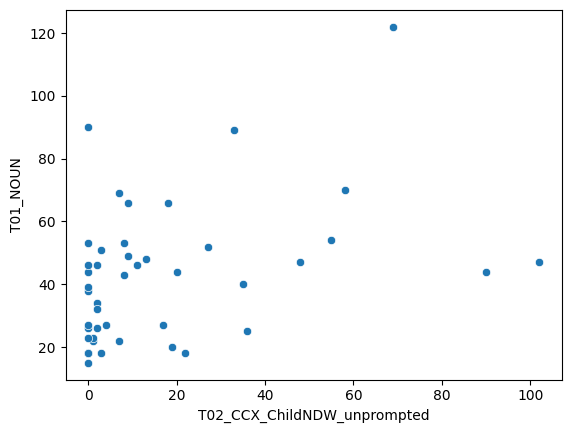

In [ ]:
import pandas as pd

TX_DATA = pd.read_csv('TX_DOSAGE_DATA_POS.csv', encoding = "ISO-8859-1") #read in all data using ISO8859-1 encoding

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

dataset = TX_DATA
sns.scatterplot(data = TX_DATA, x='T02_CCX_ChildNDW_unprompted', y='T01_NOUN')


import scipy.stats
TX_DATA = TX_DATA[TX_DATA['T02_CCX_ChildNDW_unprompted'].notna()]
x = TX_DATA["T02_CCX_ChildNDW_unprompted"]
y = TX_DATA["T01_NOUN"]
scipy.stats.pearsonr(x, y)[0]    # Pearson's r


r, p = scipy.stats.pearsonr(x,y)

print(r)
print(p)

TX: Post Pronouns and Noun Percent Correlation

0.44102854644436085
1.2116833675505022e-05


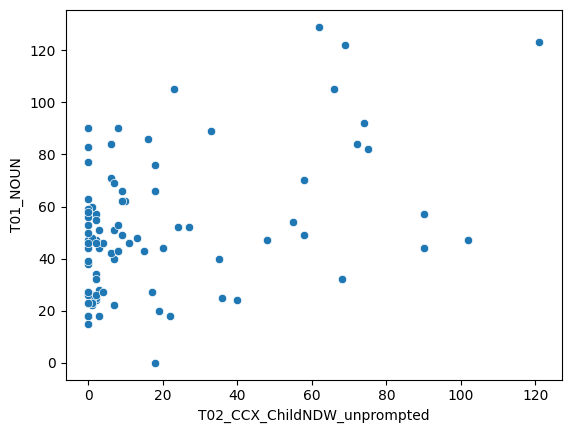

In [ ]:
BAU_DATA = pd.read_csv('BAU_DOSAGE_DATA_POS.csv', encoding = "ISO-8859-1") #read in all data using ISO8859-1 encoding

BAU_DATA = pd.read_csv('BAU_DOSAGE_DATA_POS.csv', encoding = "ISO-8859-1") #read in all data using ISO8859-1 encoding

dataset = BAU_DATA
sns.scatterplot(data = BAU_DATA, x='T02_CCX_ChildNDW_unprompted', y='T01_NOUN')


import scipy.stats
BAU_DATA = BAU_DATA[BAU_DATA['T02_CCX_ChildNDW_unprompted'].notna()]
x = BAU_DATA["T02_CCX_ChildNDW_unprompted"]
y = BAU_DATA["T01_NOUN"]
scipy.stats.pearsonr(x, y)[0]    # Pearson's r


r, p = scipy.stats.pearsonr(x,y)

print(r)
print(p)

Two Tailed T-test

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

ALL_DATA = pd.read_csv('DOSAGE_DATA_POS.csv', encoding = "ISO-8859-1") #read in all data using ISO8859-1 encoding


df = ALL_DATA[['Condition_Number', 'T01_NOUN']]

df.head()

group1 = df[df['Condition_Number']==1]
group2 = df[df['Condition_Number'] ==2]
ttest_ind(group1['T01_NOUN'], group2['T01_NOUN'])

TtestResult(statistic=-1.8814296805463369, pvalue=0.062377627008107284, df=118.0)

# Results and Discussion

In the TX group, there was a correlation of 0.39 between number of nouns caregivers used at post-testing and number of different words children used at follow-up (p = 0.01).

In the BAU group, there was a correlation of 0.44 between number of nouns caregivers used at post-testing and number of different words children used at follow-up (p = 0.00).

This tells us that caregivers in the treatment and control group both had a moderate positive correlation between the number of nouns modeled by caregivers after they were trained, and the number of different words children would use at a later date. This is an interesting result, indicating that caregivers who uses more nouns had children who had more diversity in their words. While this is supported (Hadley et al., 2020), it appers that the training did not effect the number of nouns used by caregivers.

In a two-sample t-test between the TX and BAU groups, the t-test was -1.89 (p = 0.06). This indicates that there was not a significant difference in the percent of nouns between the TX and BAU groups at follow-up. This indicates that caregivers that were trained did not use more nouns than the BAU group.

While nouns were not a focus of training in the original study, current research using similar parent training strategies now place an emphasis on nouns. Future analysis should see if the caregiver training increases the number of nouns modeled by caregivers, and continue to assess it's relationship to child outcomes.

# References

Bisong, E. (2019). Google Colaboratory. In: Building Machine Learning and Deep Learning Models on Google Cloud Platform. Apress, Berkeley, CA.

Honnibal, M., & Montani, I. (2017). spaCy 2: Natural language understanding with Bloom embeddings, convolutional neural networks and incremental parsing.

Hadley, P. Exploring sentence diversity at the boundary of
typical and impaired language abilities. Journal of Speech,
Language, and Hearing Research. 2020; 63: 3236-3251.

Hadley, P., McKenna, M., &amp; Rispoli, M. Sentence diversity in
early language development: Recommendations for target selection and
progress monitoring. American Journal of Speech-Language. 2018; 27:
553-565

Roberts, M. Y., Stern, Y. S., Grauzer, J., Nietfeld, J. Thompson, S., Jones, M., Kaat, A. J., Kaiser, A. P. (2022). Teaching caregivers to support social communication: Results from a randomized clinical trial of austistic toddlers. 32(1) 115-127. American Journal of Speech-Language Pathology.

